In [1]:
%load_ext nb_black
%config InlineBackend.figure_format = 'retina'
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import time
import pickle
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [2]:
# Import Dataset(s)
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

<IPython.core.display.Javascript object>

In [3]:
# Working with 'balanced'
# Import 
from emnist import extract_training_samples
images_train, labels_train = extract_training_samples('balanced')
from emnist import extract_test_samples
images_test, labels_test = extract_test_samples('balanced')

<IPython.core.display.Javascript object>

In [4]:
# Check shape of training and testing data
print(images_train.shape)
print(labels_train.shape)
print(images_test.shape)
print(labels_test.shape)

(112800, 28, 28)
(112800,)
(18800, 28, 28)
(18800,)


<IPython.core.display.Javascript object>

In [5]:
X_train = np.expand_dims(images_train, 3)
y_train = labels_train

X_val = np.expand_dims(images_test, 3)
y_val = labels_test

<IPython.core.display.Javascript object>

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(112800, 28, 28, 1)
(112800,)
(18800, 28, 28, 1)
(18800,)


<IPython.core.display.Javascript object>

## create mapping

In [7]:
import string
nums = list(string.digits)
upper = list(string.ascii_uppercase)
lower = list('abdefghnqrt')
classes = nums + upper + lower

mapping = {}
for i, value in enumerate(classes):
    mapping[i] = value
    pass

<IPython.core.display.Javascript object>

## visualize dataset

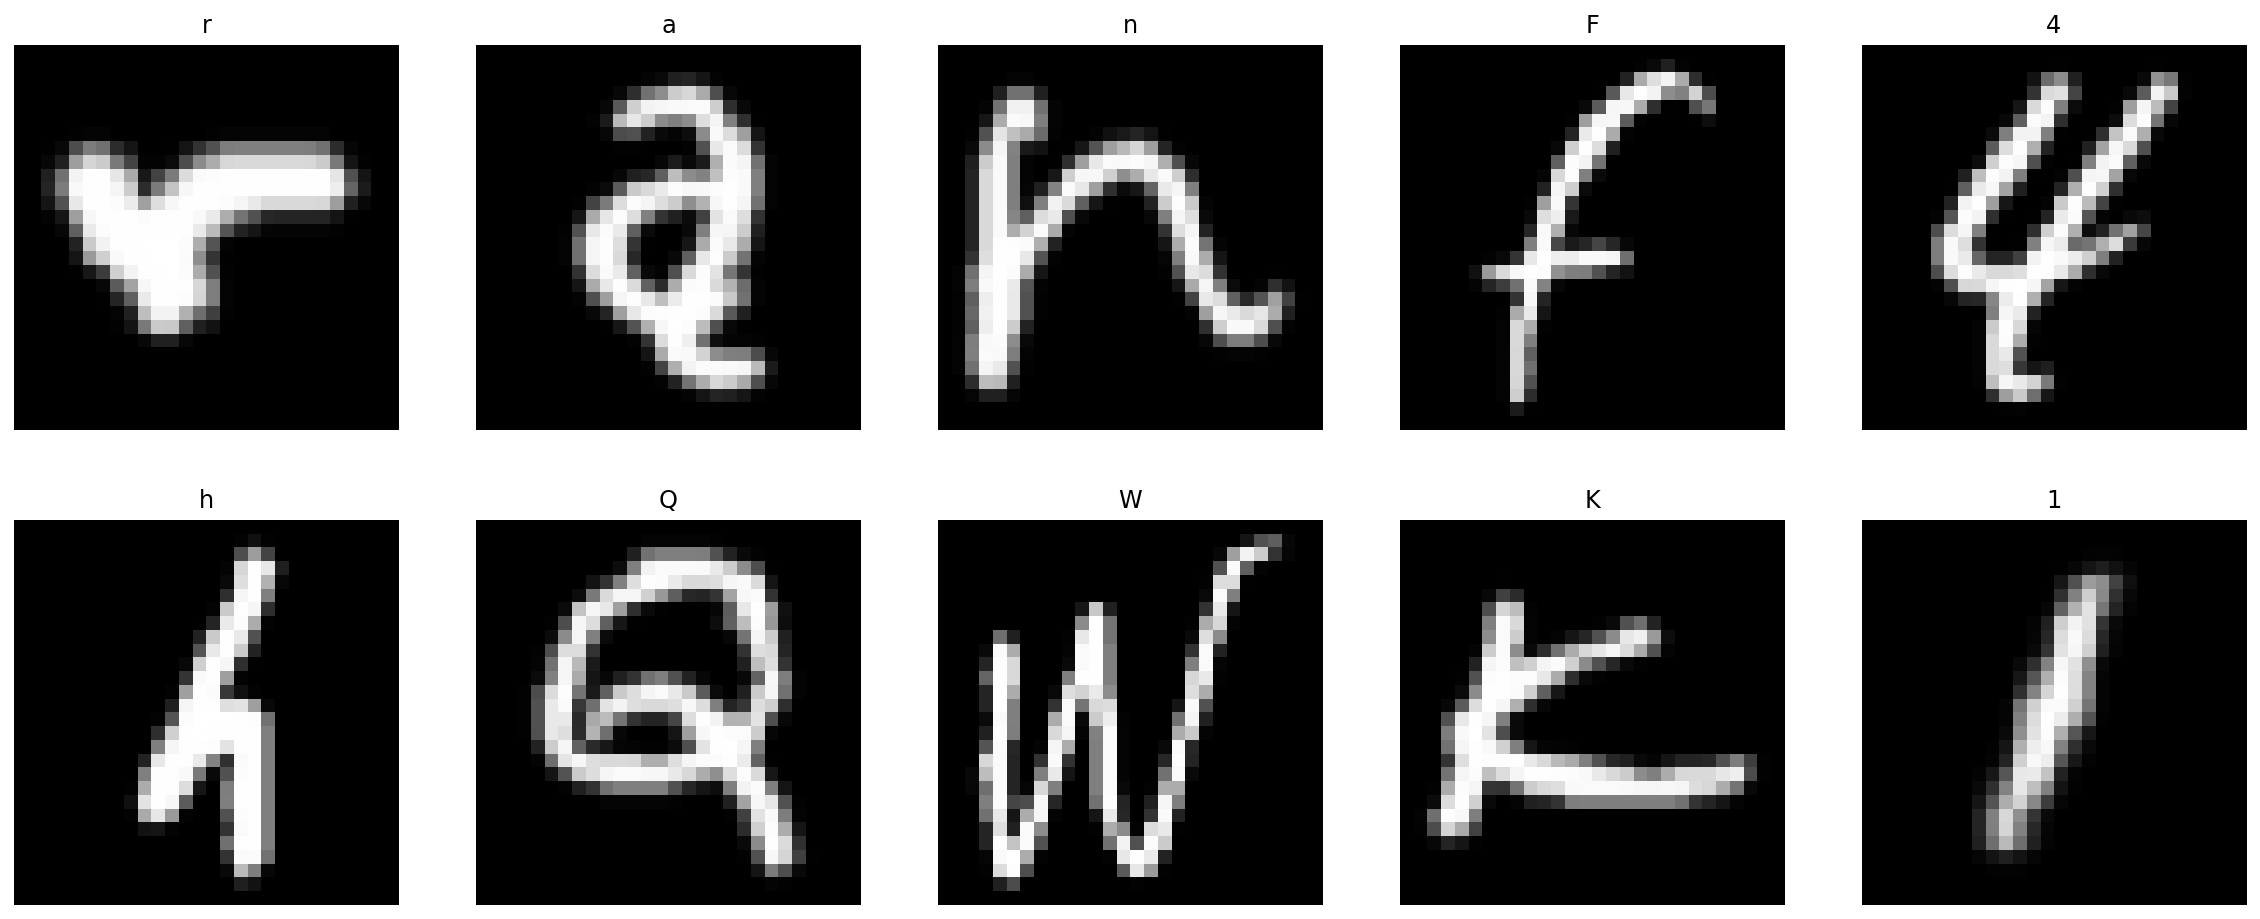

<IPython.core.display.Javascript object>

In [8]:
plt.figure(figsize = (20, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap = 'gray')
    plt.title('{}'.format(mapping[y_train[i]]))
    plt.axis('off')
    pass
plt.show()

## create dataset

In [9]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

<IPython.core.display.Javascript object>

In [10]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

<IPython.core.display.Javascript object>

In [11]:
train_dataset

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.uint8, tf.uint8)>

<IPython.core.display.Javascript object>

## train model

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (5, 5), activation = 'relu', input_shape = (28, 28, 1), name = '1st_conv'),
    tf.keras.layers.AveragePooling2D(2, 2, name = '1st_pooling'),
    tf.keras.layers.Conv2D(16, (5, 5), activation = 'relu', name = '2nd_conv'),
    tf.keras.layers.AveragePooling2D(2, 2, name = '2nd_pooling'),
    tf.keras.layers.Flatten(name = 'flatten'),
    tf.keras.layers.Dropout(0.5, name = '1st_dropout'),
    tf.keras.layers.Dense(120,activation='relu', name = '1st_fc'),
    tf.keras.layers.Dense(84,activation='relu', name = '2nd_fc'),
    tf.keras.layers.Dense(47, name = '3rd_fc')
])

<IPython.core.display.Javascript object>

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1st_conv (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
1st_pooling (AveragePooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
2nd_conv (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
2nd_pooling (AveragePooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
1st_dropout (Dropout)        (None, 256)               0         
_________________________________________________________________
1st_fc (Dense)               (None, 120)               3

<IPython.core.display.Javascript object>

In [14]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

callbacks = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_sparse_categorical_accuracy', 
    patience = 10, 
    mode = 'auto'
)

<IPython.core.display.Javascript object>

In [15]:
t0 = time.time()

<IPython.core.display.Javascript object>

In [16]:
history = model.fit(
    train_dataset,
    epochs=50,
    #callbacks = [callbacks],
    validation_data=test_dataset,
    verbose=1
)

Epoch 1/50
1763/1763 [==============================] - 37s 21ms/step - loss: 3.9267 - sparse_categorical_accuracy: 0.2929 - val_loss: 0.7669 - val_sparse_categorical_accuracy: 0.7594
Epoch 2/50
1763/1763 [==============================] - 32s 18ms/step - loss: 1.0212 - sparse_categorical_accuracy: 0.6813 - val_loss: 0.6005 - val_sparse_categorical_accuracy: 0.8021
Epoch 3/50
1763/1763 [==============================] - 35s 20ms/step - loss: 0.8200 - sparse_categorical_accuracy: 0.7364 - val_loss: 0.5351 - val_sparse_categorical_accuracy: 0.8188
Epoch 4/50
1763/1763 [==============================] - 32s 18ms/step - loss: 0.7363 - sparse_categorical_accuracy: 0.7586 - val_loss: 0.4932 - val_sparse_categorical_accuracy: 0.8318
Epoch 5/50
1763/1763 [==============================] - 32s 18ms/step - loss: 0.6870 - sparse_categorical_accuracy: 0.7725 - val_loss: 0.4686 - val_sparse_categorical_accuracy: 0.8377
Epoch 6/50
1763/1763 [==============================] - 32s 18ms/step - loss: 0.

<IPython.core.display.Javascript object>

In [17]:
t1 = time.time()

<IPython.core.display.Javascript object>

In [18]:
time_training = t1 - t0

<IPython.core.display.Javascript object>

In [19]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


<IPython.core.display.Javascript object>

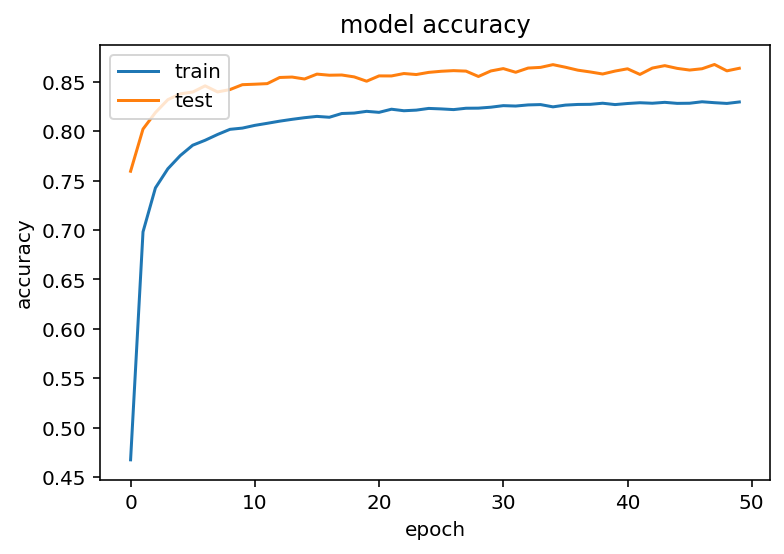

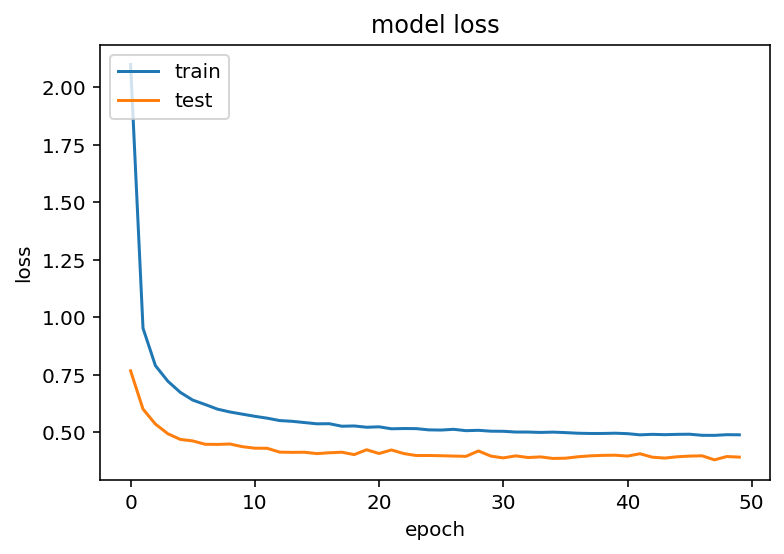

<IPython.core.display.Javascript object>

In [20]:
# summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
# Save Model
model.save("LeNet_EMNIST_trained")

INFO:tensorflow:Assets written to: LeNet_EMNIST_trained/assets


<IPython.core.display.Javascript object>

### Predict Model - EMNIST

In [22]:
from tensorflow import keras
model = keras.models.load_model('./LeNet_EMNIST_trained')

<IPython.core.display.Javascript object>

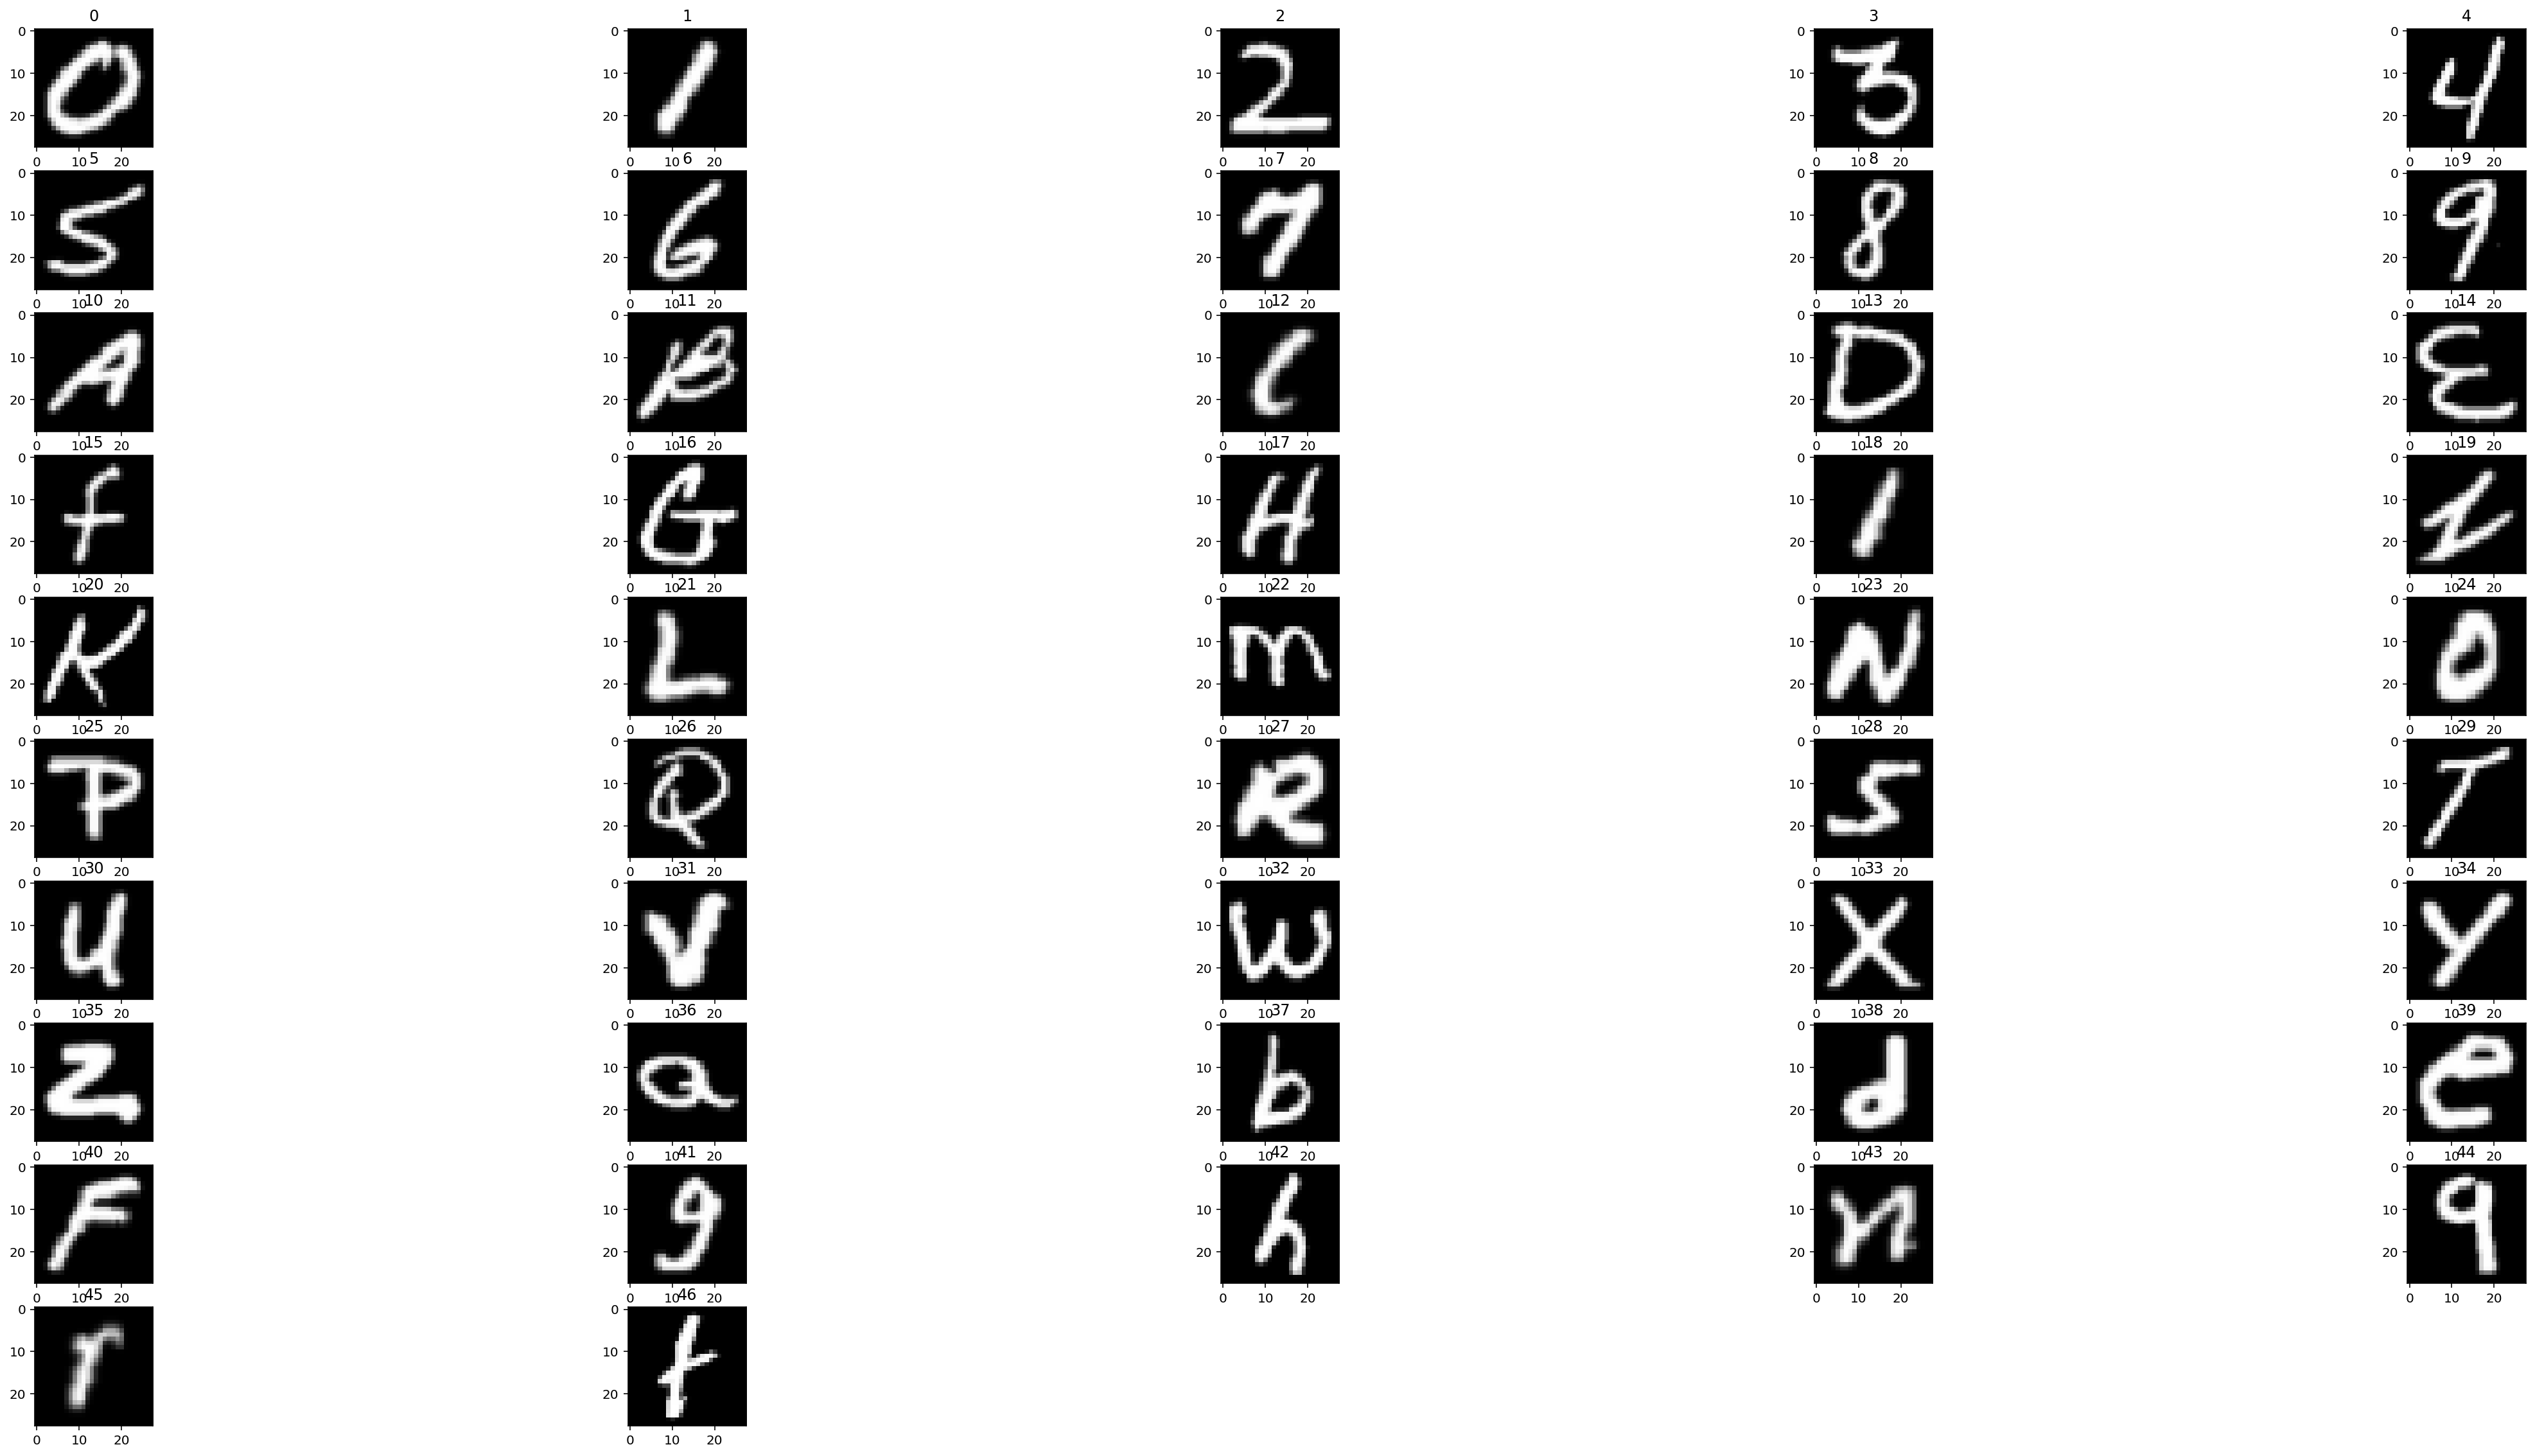

<IPython.core.display.Javascript object>

In [23]:
# visualiza labels
classes = np.unique(y_val)
plt.figure(figsize = (40, 20))
ind = 1
for i in classes: 
    for index in range(len(y_val)):
        if (y_val[index] == i ):
            plt.subplot(10, 5, ind)
            plt.imshow(X_val[index].reshape(28, 28), cmap = 'gray')
            plt.title('{}'.format(i))
            ind = ind + 1
            break
        pass
plt.show()

In [24]:
y_pred = model.predict(X_val)

<IPython.core.display.Javascript object>

In [25]:
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_val, y_pred_bool))
print(f"LeNet model trained on EMNIST tested on EMNIST has accuracy of {accuracy_score(y_val, np.argmax(y_pred,axis=1))}")

              precision    recall  f1-score   support

           0       0.68      0.48      0.57       400
           1       0.53      0.68      0.59       400
           2       0.92      0.84      0.88       400
           3       0.97      0.97      0.97       400
           4       0.92      0.89      0.90       400
           5       0.88      0.87      0.87       400
           6       0.96      0.88      0.92       400
           7       0.96      0.97      0.97       400
           8       0.90      0.93      0.92       400
           9       0.62      0.90      0.73       400
          10       0.94      0.98      0.96       400
          11       0.98      0.92      0.95       400
          12       0.95      0.95      0.95       400
          13       0.92      0.87      0.89       400
          14       0.98      0.97      0.97       400
          15       0.66      0.56      0.61       400
          16       0.89      0.95      0.92       400
          17       0.94    

<IPython.core.display.Javascript object>

### Predict Model - Merged Chars74K (Cross Validation)

In [26]:
df = pd.read_pickle('char74.pkl')
images = df['X']
labels = df['y']

<IPython.core.display.Javascript object>

In [27]:
# classes that are indistinguishable 
# C: 12, c:38
# K: 20, k: 46
# O: 24, 0: 50
# S: 28, s: 54
# V: 31, v: 57
# P: 25, p: 51
# W: 32, w: 58
# X: 33, x: 59
# Z: 35, z: 61
# I: 18, i: 44
# J: 19, j: 45
# L: 21, l: 47
# M: 22, m: 48
# U: 30, u: 56
# Y: 34, y: 60
d = {12:38,20:46,24:50,28:54,31:57,25:51,32:58,33:59,35:61,18:44,19:45,21:47,22:48,30:56,34:60}
from numpy import copy
newArray = copy(labels)
for k, v in d.items(): 
    newArray[labels==v] = k

<IPython.core.display.Javascript object>

In [28]:
lower_cases = {39:38,40:39,41:40,42:41,43:42,49:43,52:44,53:45,55:46}
new_labels = copy(newArray)
for k, v in lower_cases.items(): 
    new_labels[newArray==k] = v

<IPython.core.display.Javascript object>

In [29]:
X_train_char74, X_val_char74, y_train_char74, y_val_char74 = train_test_split(images, new_labels, test_size = 0.2)

<IPython.core.display.Javascript object>

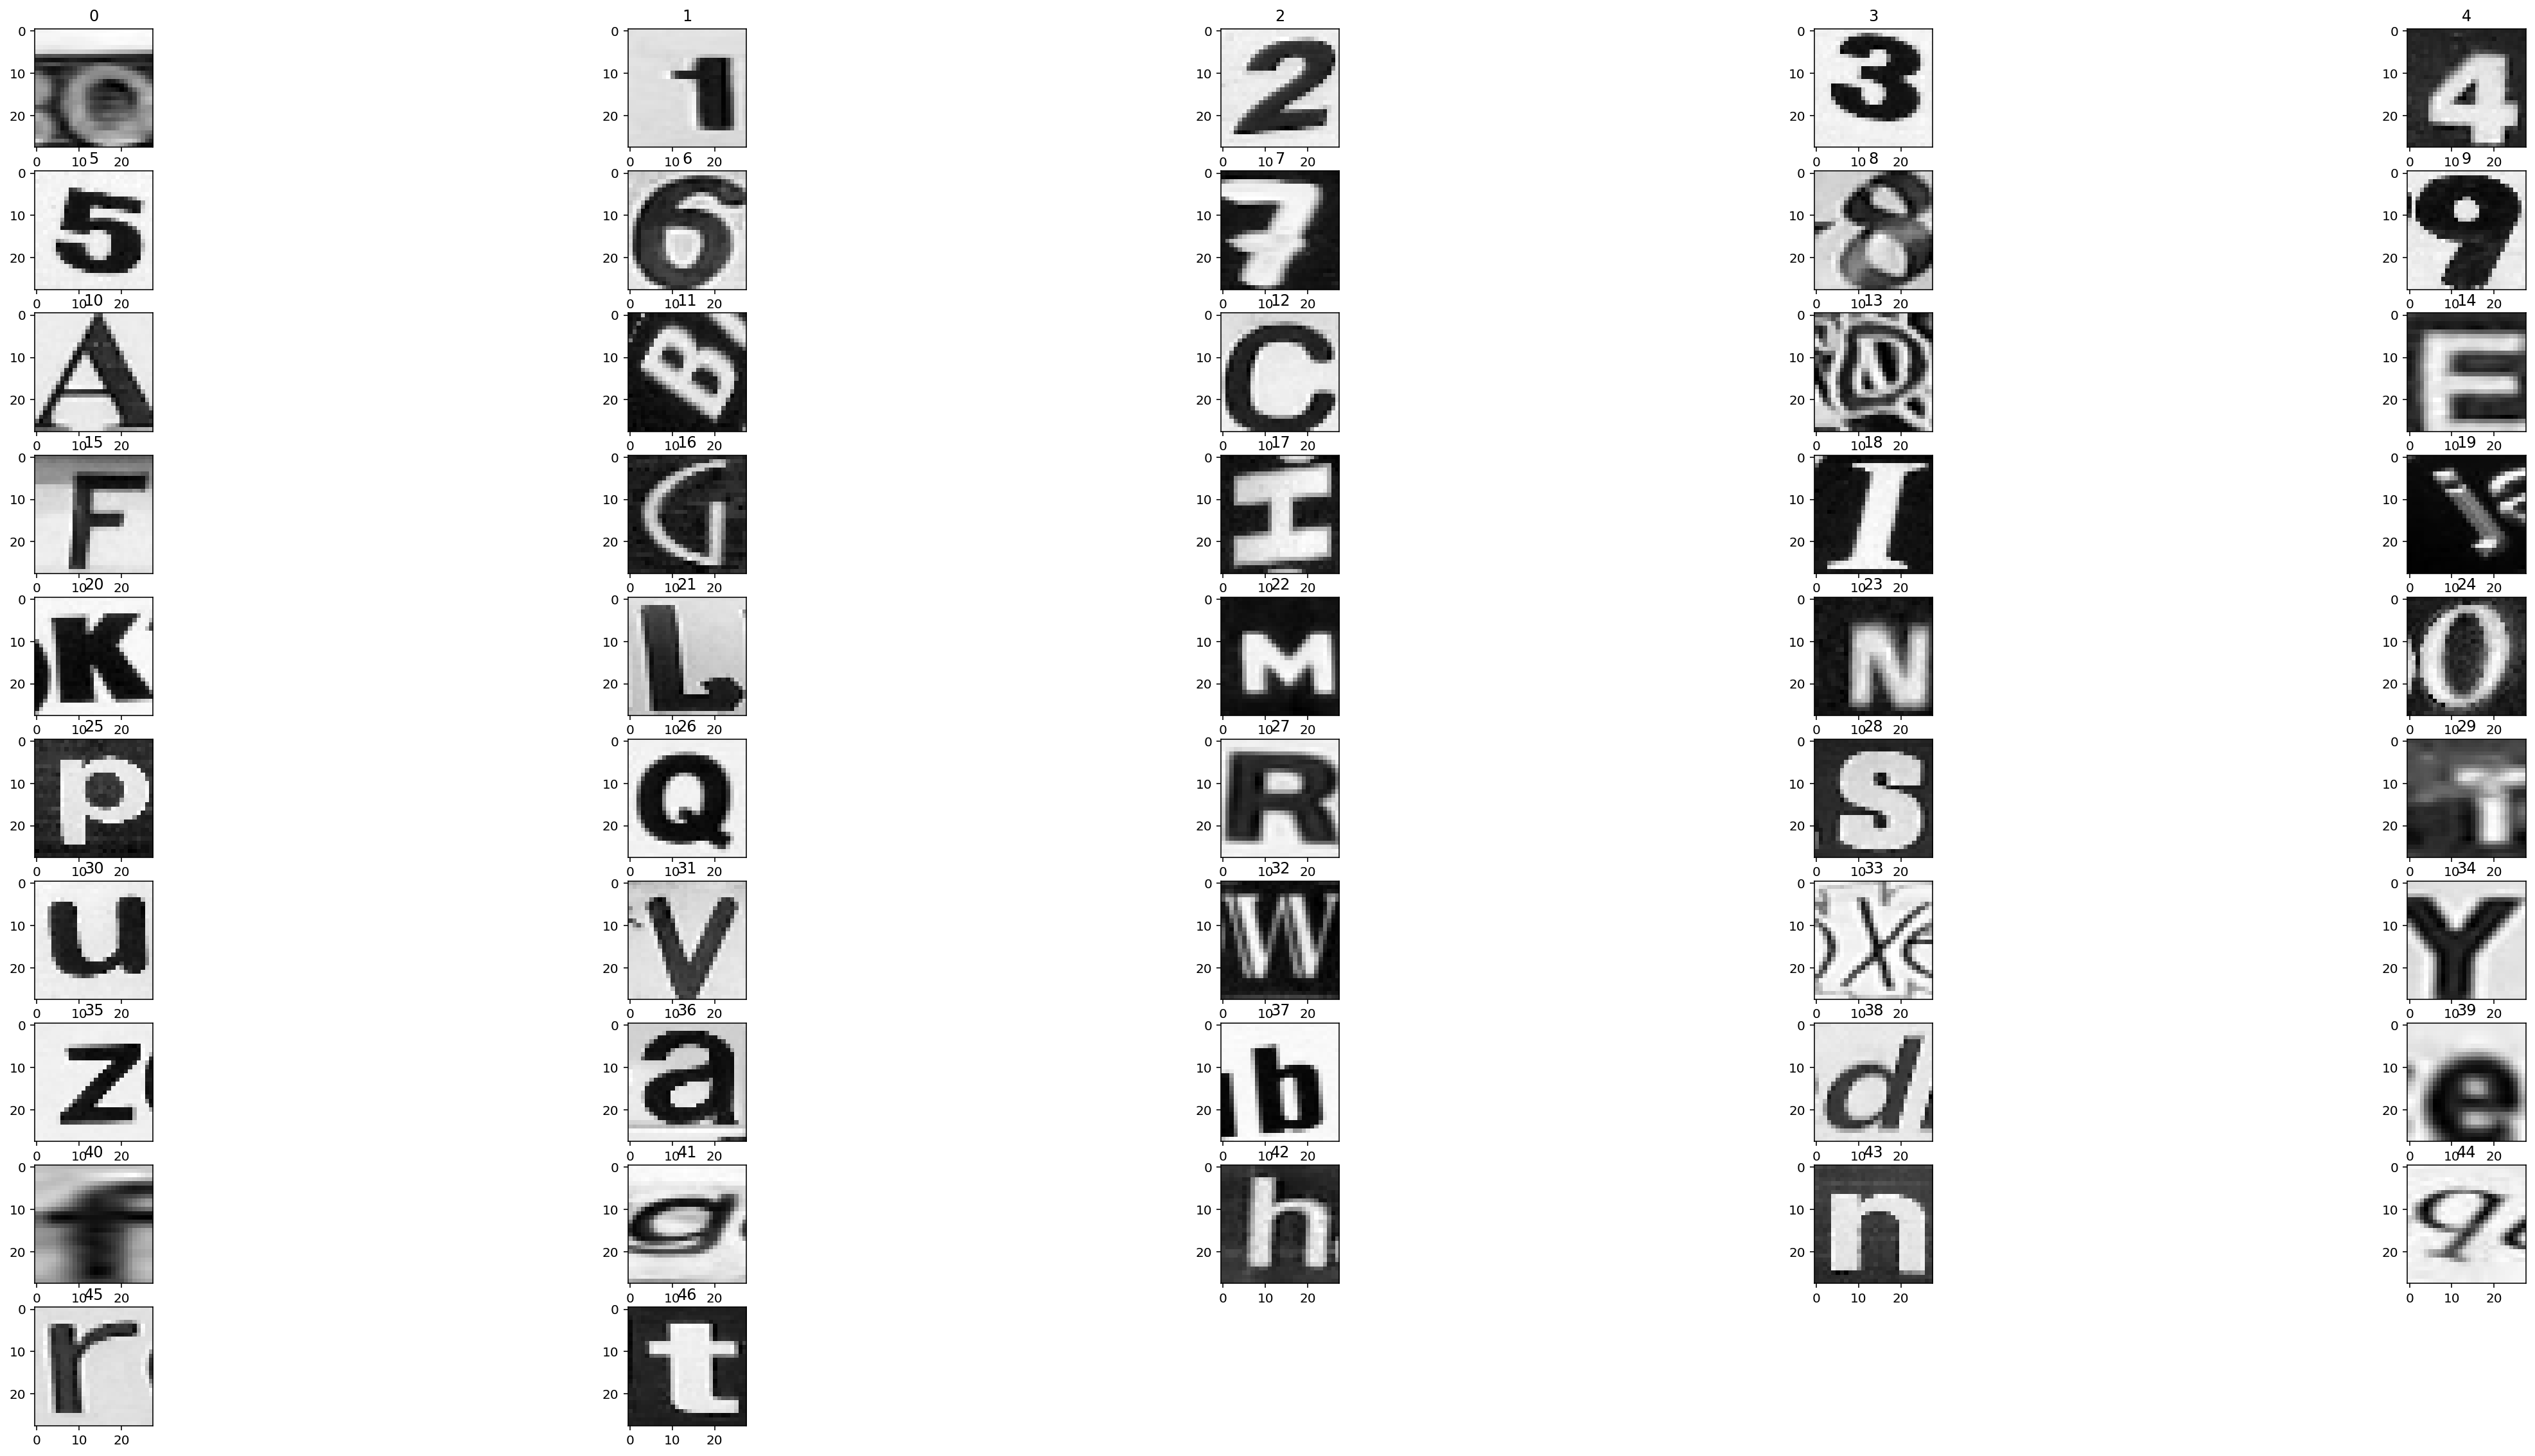

<IPython.core.display.Javascript object>

In [30]:
# visualiza labels
classes = np.unique(y_val_char74)
plt.figure(figsize = (40, 20))
ind = 1
for i in classes: 
    for index in range(len(y_val_char74)):
        if (y_val_char74[index] == i ):
            plt.subplot(10, 5, ind)
            plt.imshow(X_val_char74[index].reshape(28, 28), cmap = 'gray')
            plt.title('{}'.format(i))
            ind = ind + 1
            break
        pass
plt.show()

In [31]:
X_train_char74 = np.expand_dims(X_train_char74, 3)

X_val_char74 = np.expand_dims(X_val_char74, 3)

<IPython.core.display.Javascript object>

In [32]:
ypred2 = model.predict(X_val_char74)

<IPython.core.display.Javascript object>

In [33]:
y_pred_bool2 = np.argmax(ypred2, axis=1)

print(classification_report(y_val_char74, y_pred_bool2))
print(f"LeNet model trained on EMNIST tested on merged Char74k has accuracy of {accuracy_score(y_val_char74, np.argmax(ypred2,axis=1))}")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00       109
          11       0.00      0.00      0.00        26
          12       0.00      0.00      0.00        63
          13       0.00      0.00      0.00        40
          14       0.00      0.00      0.00        80
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        22
          17       0.00    

<IPython.core.display.Javascript object>

In [34]:
#check first 50 labels
y_val_char74[0:50] == np.argmax(ypred2,axis=1)[0:50]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

<IPython.core.display.Javascript object>

In [35]:
# correct predictions in the first 50 data points
sum(y_val_char74[0:50] == np.argmax(ypred2,axis=1)[0:50])

1

<IPython.core.display.Javascript object>

### Predict Model - EMNIST & Merged Chars74K Combined

In [36]:
# emnist data
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
emnist_image = np.concatenate((X_train,X_val), axis=0)
emnist_label = np.concatenate((y_train,y_val), axis=0)
print(emnist_image.shape, emnist_label.shape)

(112800, 28, 28, 1) (18800, 28, 28, 1) (112800,) (18800,)
(131600, 28, 28, 1) (131600,)


<IPython.core.display.Javascript object>

In [37]:
# char74k data
print(X_train_char74.shape, X_val_char74.shape, y_train_char74.shape, y_val_char74.shape)
char74_image = np.concatenate((X_train_char74,X_val_char74), axis=0)
char74_label = np.concatenate((y_train_char74,y_val_char74), axis=0)
print(char74_image.shape, char74_label.shape)

(6160, 28, 28, 1) (1540, 28, 28, 1) (6160,) (1540,)
(7700, 28, 28, 1) (7700,)


<IPython.core.display.Javascript object>

In [38]:
# combined data
all_image = np.concatenate((emnist_image,char74_image), axis=0)
all_label = np.concatenate((emnist_label,char74_label), axis=0)
print(all_image.shape, all_label.shape)

(139300, 28, 28, 1) (139300,)


<IPython.core.display.Javascript object>

In [39]:
# split train test on combined data
X_train_all, X_val_all, y_train_all, y_val_all = train_test_split(all_image, all_label, test_size = 0.2)

<IPython.core.display.Javascript object>

In [40]:
ypred3 = model.predict(X_val_all)

<IPython.core.display.Javascript object>

In [41]:
y_pred_bool3 = np.argmax(ypred3, axis=1)

print(classification_report(y_val_all, y_pred_bool3))
print(f"LeNet model trained on EMNIST tested on EMNIST and merged Char74k combined has accuracy of {accuracy_score(y_val_all, np.argmax(ypred3,axis=1))}")

              precision    recall  f1-score   support

           0       0.71      0.46      0.56       592
           1       0.55      0.72      0.62       563
           2       0.92      0.82      0.87       554
           3       0.98      0.98      0.98       579
           4       0.93      0.86      0.89       536
           5       0.88      0.86      0.87       616
           6       0.96      0.80      0.87       577
           7       0.97      0.95      0.96       548
           8       0.88      0.95      0.92       603
           9       0.61      0.90      0.73       562
          10       0.95      0.82      0.88       629
          11       0.97      0.90      0.94       566
          12       0.96      0.87      0.91       639
          13       0.91      0.87      0.89       546
          14       0.98      0.82      0.89       624
          15       0.69      0.56      0.62       577
          16       0.89      0.92      0.90       566
          17       0.95    

<IPython.core.display.Javascript object>

## train on Char74k & EMNIST combined

In [42]:
print(X_train_all.shape, y_train_all.shape)

(111440, 28, 28, 1) (111440,)


<IPython.core.display.Javascript object>

In [43]:
train_dataset_all = tf.data.Dataset.from_tensor_slices((X_train_all, y_train_all))
test_dataset_all = tf.data.Dataset.from_tensor_slices((X_val_all, y_val_all))

<IPython.core.display.Javascript object>

In [44]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset_all = train_dataset_all.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset_all = test_dataset_all.batch(BATCH_SIZE)

<IPython.core.display.Javascript object>

In [45]:
train_dataset_all

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float64, tf.int64)>

<IPython.core.display.Javascript object>

In [46]:
t2 = time.time()

<IPython.core.display.Javascript object>

In [47]:
hist = model.fit(
    train_dataset_all,
    epochs=50,
    #callbacks = [callbacks],
    validation_data=test_dataset_all,
)

Epoch 1/50
1742/1742 [==============================] - 54s 30ms/step - loss: 0.6798 - sparse_categorical_accuracy: 0.7842 - val_loss: 0.5365 - val_sparse_categorical_accuracy: 0.8283
Epoch 2/50
1742/1742 [==============================] - 39s 22ms/step - loss: 0.6701 - sparse_categorical_accuracy: 0.7850 - val_loss: 0.5242 - val_sparse_categorical_accuracy: 0.8307
Epoch 3/50
1742/1742 [==============================] - 37s 21ms/step - loss: 0.6694 - sparse_categorical_accuracy: 0.7856 - val_loss: 0.5306 - val_sparse_categorical_accuracy: 0.8285
Epoch 4/50
1742/1742 [==============================] - 37s 21ms/step - loss: 0.6637 - sparse_categorical_accuracy: 0.7848 - val_loss: 0.5420 - val_sparse_categorical_accuracy: 0.8249
Epoch 5/50
1742/1742 [==============================] - 32s 19ms/step - loss: 0.6619 - sparse_categorical_accuracy: 0.7868 - val_loss: 0.5285 - val_sparse_categorical_accuracy: 0.8290
Epoch 6/50
1742/1742 [==============================] - 38s 22ms/step - loss: 0.

<IPython.core.display.Javascript object>

In [48]:
t3 = time.time()

<IPython.core.display.Javascript object>

In [49]:
time_training_combined = t3 - t2

<IPython.core.display.Javascript object>

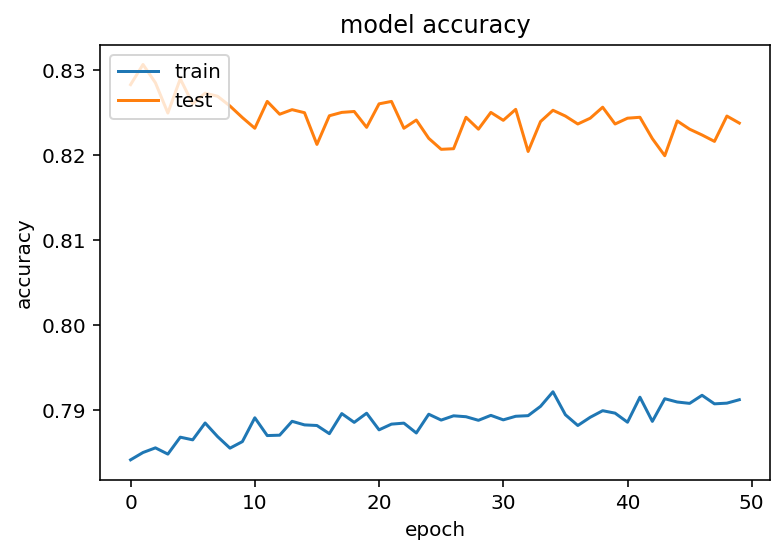

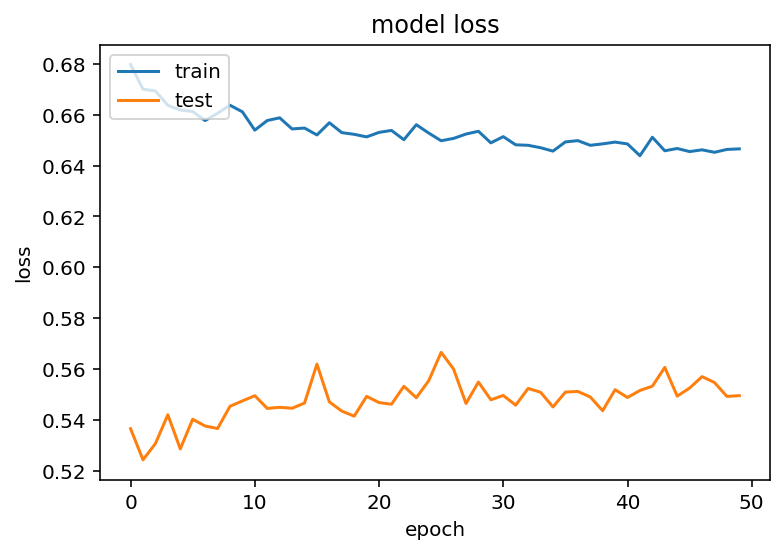

<IPython.core.display.Javascript object>

In [50]:
# summarize history for accuracy
plt.plot(hist.history['sparse_categorical_accuracy'])
plt.plot(hist.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
ypred4 = model.predict(X_val_all)

<IPython.core.display.Javascript object>

In [52]:
y_pred_bool4 = np.argmax(ypred4, axis=1)

print(classification_report(y_val_all, y_pred_bool4))
print(f"LeNet model trained on EMNIST and merged Char74k combined tested on EMNIST and merged Char74k combined has accuracy of {accuracy_score(y_val_all, np.argmax(ypred4,axis=1))}")

              precision    recall  f1-score   support

           0       0.65      0.64      0.64       592
           1       0.53      0.75      0.62       563
           2       0.90      0.81      0.85       554
           3       0.97      0.97      0.97       579
           4       0.93      0.83      0.88       536
           5       0.90      0.82      0.86       616
           6       0.89      0.89      0.89       577
           7       0.95      0.95      0.95       548
           8       0.88      0.95      0.91       603
           9       0.60      0.88      0.71       562
          10       0.88      0.82      0.85       629
          11       0.96      0.90      0.93       566
          12       0.94      0.87      0.90       639
          13       0.93      0.82      0.87       546
          14       0.95      0.83      0.88       624
          15       0.73      0.49      0.59       577
          16       0.93      0.88      0.90       566
          17       0.95    

<IPython.core.display.Javascript object>

In [53]:
# Save Model
model.save("LeNet_EMNIST&Char74k_trained")

INFO:tensorflow:Assets written to: LeNet_EMNIST&Char74k_trained/assets


<IPython.core.display.Javascript object>

In [54]:
time_training # EMNIST

1844.7382638454437

<IPython.core.display.Javascript object>

In [55]:
time_training_combined # EMNIST + Chars74K

1919.1000580787659

<IPython.core.display.Javascript object>